In [49]:
import os

import pandas as pd 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [43]:
df=xr.open_dataset('/home/kmk58/remoteData/GRACE_7DAY/GRACEDADM_CLSM0125US_7D.A20020603.040.nc4')

date = pd.to_datetime(df['time'].values[0])

selected_time = date
df_subset = df.sel(time=selected_time)
df_subset
#mean_gws_inst = df_subset['gws_inst'].values
#np.nanmean(mean_gws_inst)

<xarray.Dataset>
Dimensions:     (lat: 224, lon: 464)
Coordinates:
  * lat         (lat) float32 25.06 25.19 25.31 25.44 ... 52.69 52.81 52.94
  * lon         (lon) float32 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
    time        datetime64[ns] 2002-06-03
Data variables:
    gws_inst    (lat, lon) float32 ...
    rtzsm_inst  (lat, lon) float32 ...
    sfsm_inst   (lat, lon) float32 ...
Attributes: (12/15)
    missing_value:          -999.0
    title:                  GRACE Data Assimilation Drought Indicator
    version:                040
    input:                  CLSM_NATURE/CSR_GRACE_GRACE-FO_RL06_Mascons_all-c...
    institution:            NASA GSFC HSL
    source:                 Catchment
    ...                     ...
    comment:                website: http://drought.unl.edu/MonitoringTools/N...
    MAP_PROJECTION:         EQUIDISTANT CYLINDRICAL
    SOUTH_WEST_CORNER_LAT:  25.0625
    SOUTH_WEST_CORNER_LON:  -124.9375
    DX:                     0.125
    DY:                     0.125

In [47]:
gws_p_values=df_subset['gws_inst']
list(gws_p_values)


#plt.hist(gws_p_values)

[<xarray.DataArray 'gws_inst' (lon: 464)>
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
     lat      float32 25.06
   * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
     time     datetime64[ns] 2002-06-03
 Attributes:
     units:          %
     standard_name:  ground_water_storage_percentile
     long_name:      Groundwater storage percentile
     cell_methods:   time: point
     vmin:           0.21321961
     vmax:           100.0,
 <xarray.DataArray 'gws_inst' (lon: 464)>
 array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
 Coordinates:
     lat      float32 25.19
   * lon      (lon) float32 -124.9 -124.8 -124.7 -124.6 ... -67.31 -67.19 -67.06
     time     datetime64[ns] 2002-06-03
 Attributes:
     units:          %
     standard_name:  ground_water_storage_percentile
     long_name:      Groundwater storage percentile
     cell_methods:   time: point
     vmin:           0.21321961
     vmax:           100.0,
 <xa

In [2]:
path = "/home/kmk58/remoteData/GRACE_7DAY/"

list_grace=[]
import os
import xarray as xr

path = "/home/kmk58/remoteData/GRACE_7DAY/"
list_grace = []

for filename in os.listdir(path):
    if filename.endswith('.nc4'):
        df1 = xr.open_dataset(str(path + str(filename)))
        df1
        df1_subset = df1.sel(lat=slice(30,40), lon=slice(-120,-110))
        mean_gws_inst = np.nanmean(df1_subset['gws_inst'].values)
        date = pd.to_datetime(df1_subset['time'].values[0])

    list_df = [date,mean_gws_inst]
    list_grace.append(list_df)

df_grace = pd.DataFrame(list_grace, columns=['Date', 'Mean'])
df_grace

/home/kmk58/.local/lib/python3.11/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


,Date,Mean
0,2003-05-12,23.092819
1,2003-05-12,23.092819
2,2002-04-01,13.591987
3,2002-04-08,13.004784
4,2002-04-15,12.520956
...,...,...
1087,2019-06-03,55.846809
1088,2019-06-10,56.477711
1089,2019-06-17,56.498718
1090,2019-06-24,56.493095


In [16]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


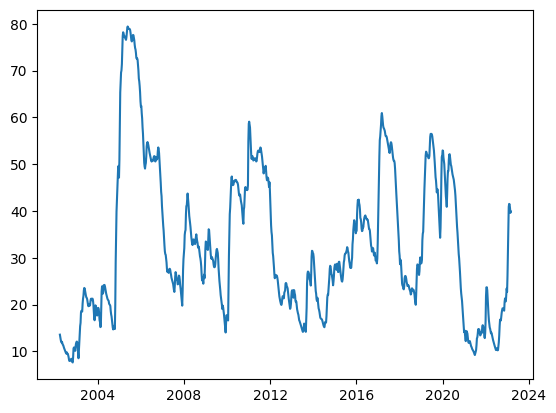

In [6]:
GRACE_sorted = df_grace.sort_values(by=['Date'])
plt.plot(GRACE_sorted['Date'], GRACE_sorted['Mean'])

#df = pd.DataFrame.from_dict(dict_grace, orient='index')
#df

<Figure size 1000x1000 with 0 Axes>

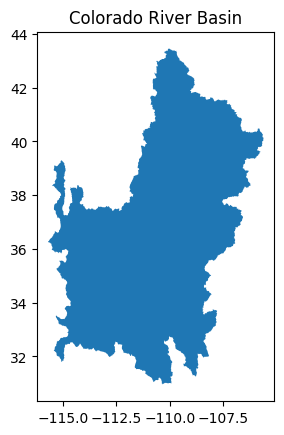

In [52]:
#Loading shapefile of CRB (comprising of 8 total regions, including Upper and Lower basin)
s = gpd.read_file("/home/kmk58/remoteData/CRB_SHAPEFILE/CRB_SHAPEFILE/Aqueduct_river_basins_COLORADO RIVER (PACIFIC OCEAN).shp")


# plot of entire Colorado River Basin
plt.figure(figsize=[10,10])
s.plot()
plt.title("Colorado River Basin")
plt.show()